In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %% Initialization

risk_tickers = [
    'ARKK', 'SPHB', 'BTC-USD', 'XBI', 'XLK', 'SOXX', 'XLY', 'IWM', 'EEM',
    'HYG', 'USO', 'DBC', 'CPER',
    'AUDJPY=X',
]

safe_tickers = [
    'TLT', 'BIL', 'SPLV', 'XLP', 'XLU', 'XLV', 'GLD',
]

## 1. Retrieving Pricing Information

In [3]:
def retrieve_all_prices_yf(risk_tickers, safe_tickers, end_date, 
                           frequency='M', benchmark='SPY'):
    """
    Retrieve all closing prices for the supplied tickers using yfinance.
    """

    # create empty dataframes
    risk_prices = pd.DataFrame()
    safe_prices = pd.DataFrame()

    # We select a start date 15 periods before the end date to make sure we have enough information for 12 periods
    if frequency == 'M':
        start_date = (datetime.strptime(end_date, '%Y-%m-%d') - relativedelta(months=15, days=1)).date()

    else:
        start_date = (datetime.strptime(end_date, '%Y-%m-%d') - relativedelta(weeks=15, days=1)).date()

    for ticker in risk_tickers:
        # retrieve risk tickers from yf
        risk_prices[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

    for ticker in safe_tickers:
        safe_prices[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

    benchmark_prices = (yf.download(benchmark, start_date, end_date)['Adj Close']
                        .to_frame(name=benchmark))

    # convert all indexes to datetime
    risk_prices.index = pd.to_datetime(risk_prices.index)
    safe_prices.index = pd.to_datetime(safe_prices.index)
    benchmark_prices.index = pd.to_datetime(benchmark_prices.index)

    return risk_prices, safe_prices, benchmark_prices

## 2. Calculate Standardized Performance Against the Benchmark (SPY)

In [4]:
def calculate_standardized_period_returns(risk_prices, safe_prices, benchmark_prices, frequency='M'):
    """
    Calculate the standardized period returns of ETFs relative to a benchmark (SPY).

    Parameters:
    risk_prices (DataFrame): DataFrame of prices for risk-on ETFs.
    safe_prices (DataFrame): DataFrame of prices for risk-off ETFs.
    benchmark_prices (DataFrame): DataFrame of prices for the benchmark ETF (SPY).

    Returns:
    DataFrame: A DataFrame with standardized monthly returns of ETFs.
    """
    # Standardize prices as relative strength to the benchmark (SPY)
    risk_rel_strength = risk_prices.div(benchmark_prices.iloc[:, 0], axis=0)
    safe_rel_strength = safe_prices.div(benchmark_prices.iloc[:, 0], axis=0)

    if frequency == 'M':
        # Calculate the monthly change in standardized prices
        risk_monthly_change = risk_rel_strength.resample('M').last().pct_change()
        safe_monthly_change = safe_rel_strength.resample('M').last().pct_change()

    else:
        # Calculate the weekly change in standardized prices
        risk_monthly_change = risk_rel_strength.resample('W').last().pct_change()
        safe_monthly_change = safe_rel_strength.resample('W').last().pct_change()

    # Combining risk and safe dataframes
    combined_monthly_change = pd.concat([risk_monthly_change, safe_monthly_change], axis=1)

    # Dropping the first row as it will be NaN due to pct_change()
    combined_monthly_change = combined_monthly_change.dropna()

    # Create the final dataframe with reversed columns (most recent first)
    final_monthly_returns_df = combined_monthly_change.T.iloc[:, ::-1]

    return final_monthly_returns_df

## 3. Calculate Percentiles

In [5]:
def calculate_percentiles(data):

  return data.rank(pct=True, axis=0)

## 4. Create the Heatmap

In [6]:
def plot_percentile_heatmap(df, end_date):
    """
    Plot a heatmap using percentile ranks of the data in df.

    Parameters:
    df (DataFrame): The DataFrame with the data to plot.
    end_date (str): The end date of the data period.
    """


    df_inverted = np.round(100 - (percentile_ranks * 100), 0).replace(0, 1)

    # Normalize the percentile ranks for color mapping
    norm = plt.Normalize(1, 100)
    color_map = plt.cm.RdYlGn_r

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(df_inverted, annot=True, fmt=".0f", cmap=color_map, norm=norm, linewidths=0.5,
                linecolor='black', cbar_kws={"ticks": np.linspace(0, 1, 11)}, ax=ax)

    # Set the ETF names as y-tick labels on the left
    ax.set_yticklabels(df.index, rotation=0, ha='right')
    ax.yaxis.tick_left()

    # Format x-tick labels as 'YYYY-MM-DD'
    ax.set_xticklabels([pd.to_datetime(date).strftime('%Y-%m-%d') for date in df_inverted.columns], rotation=45)

    # Set the title with dynamic dates, centered
    fig.suptitle(f"Risk-On vs. Risk Off Percentile Dashboard: {end_date}", fontsize=16)

    # Add a thick border between the last risk on ticker and first risk off ticker
    ax.axhline(y=len(risk_tickers), color='black', linewidth=3)

    # Change color bar tick color
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks(np.linspace(1, 100, 11))  # Set ticks from 1 to 100
    colorbar.set_ticklabels(np.linspace(1, 100, 11).astype(int))

    # Tight layout to reduce whitespace and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make space for the title

    # Show the plot
    plt.show()

## 5. Putting it All Together

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

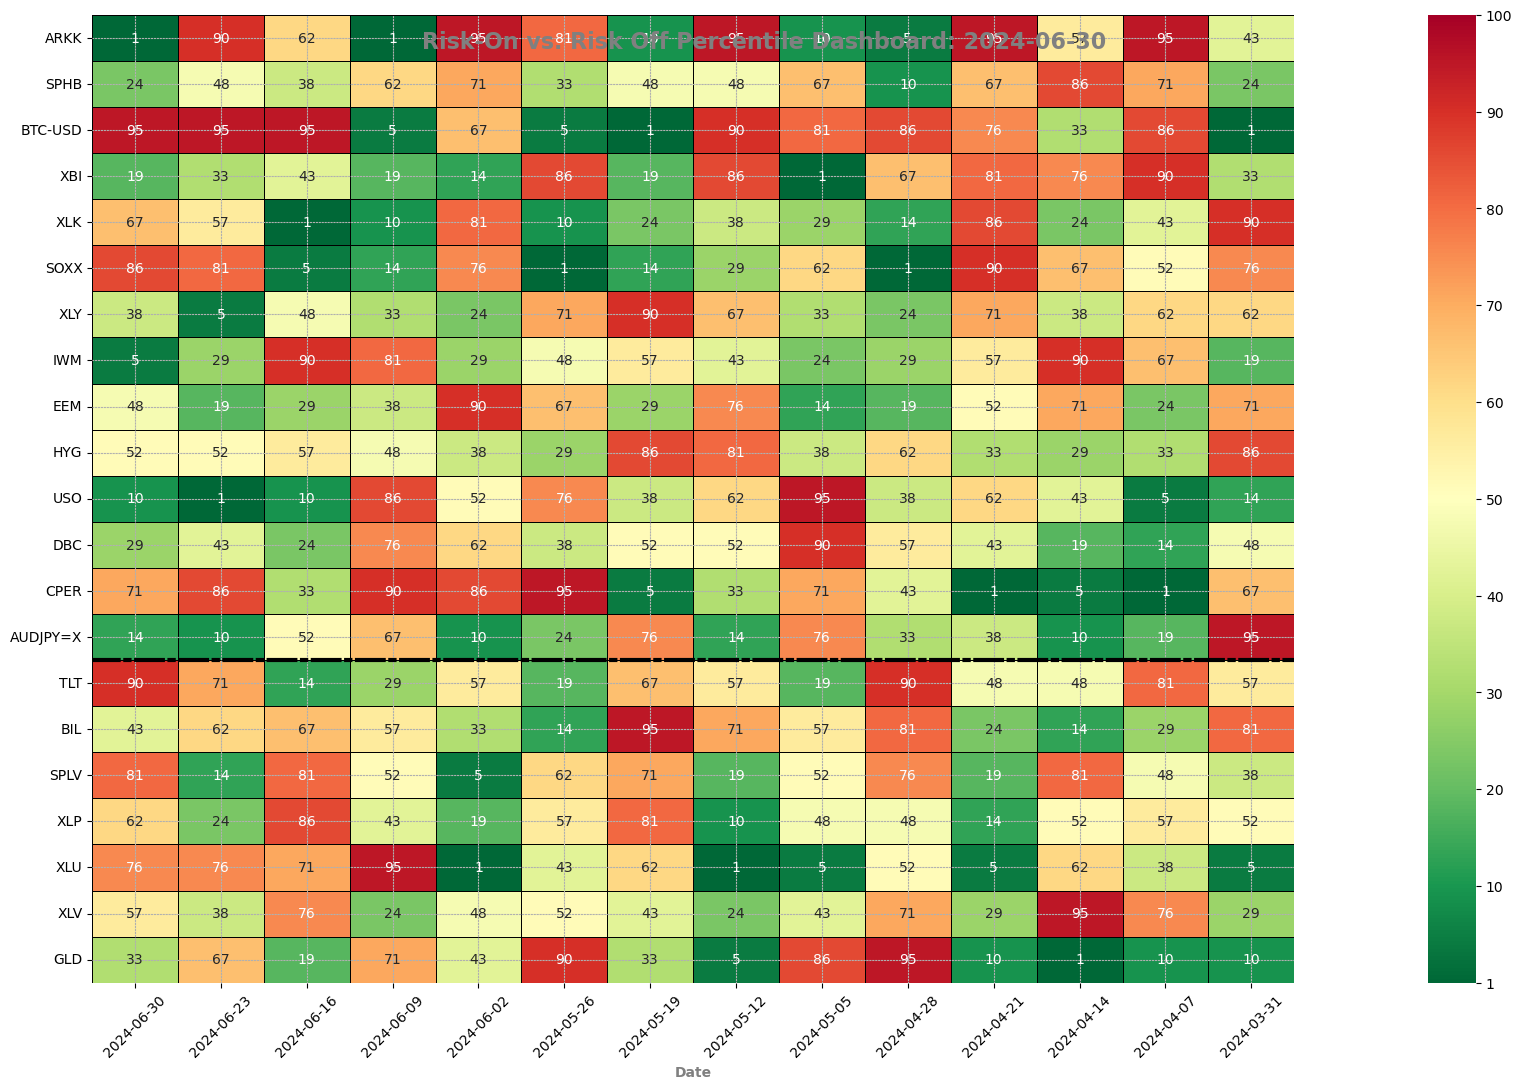

In [7]:
end_date = datetime.today().strftime('%Y-%m-%d')
frequency = 'W'

risk_prices, safe_prices, benchmark_prices = retrieve_all_prices_yf(risk_tickers, safe_tickers, end_date, frequency)
final_df = calculate_standardized_period_returns(risk_prices, safe_prices, benchmark_prices, frequency=frequency)

percentile_ranks = final_df.apply(calculate_percentiles, axis=0)
plot_percentile_heatmap(percentile_ranks, end_date)